In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.express as px
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore")
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
import seaborn as sns

from plotly.offline import plot, iplot, init_notebook_mode
import plotly.graph_objs as go
init_notebook_mode(connected=True)


ModuleNotFoundError: No module named 'xgboost'

In [129]:
# read data
my_data=pd.read_csv('Dataset/healthcare-dataset-stroke-data.csv')
print(my_data.shape)
print(my_data.info)

(5110, 12)
<bound method DataFrame.info of          id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private     

In [130]:
# data information
print(my_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB
None


In [131]:
# total number of stroke cases
y=my_data.stroke
print(y.value_counts())
print(f'Percentage of positive stroke : {round(y.value_counts(normalize=True)[1]*100,2)} % --> ({y.value_counts()[1]} patient)')
print(f'Percentage of of negetive stroke stroke: {round(y.value_counts(normalize=True)[0]*100,2)} % --> ({y.value_counts()[0]} patient)')

0    4861
1     249
Name: stroke, dtype: int64
Percentage of positive stroke : 4.87 % --> (249 patient)
Percentage of of negetive stroke stroke: 95.13 % --> (4861 patient)


In [132]:
# data describe
my_data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


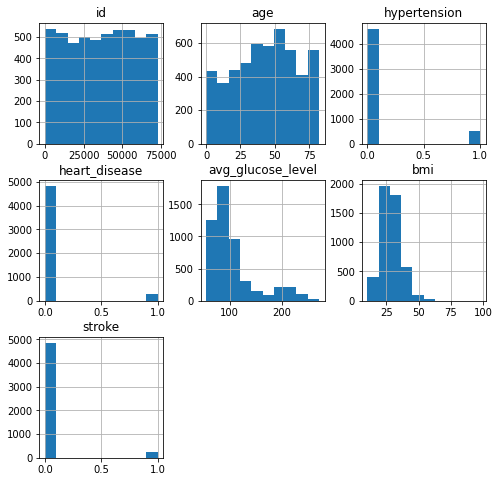

In [133]:
# data skew
numerical = ['age','avg_glucose_level','bmi']
my_data.hist(figsize=(8,8));

In [134]:
fig = px.histogram(my_data, x="hypertension", color="stroke",width=300, height=300)
fig.show()

print (f'A patient with hypertension has a probability of {round(my_data[my_data["hypertension"]==1]["stroke"].mean()*100,2)} % get a stroke')

print()

print (f'A patient without hypertension has a probability of  {round(my_data[my_data["hypertension"]==0]["stroke"].mean()*100,2)} % get a stroke')

A patient with hypertension has a probability of 13.25 % get a stroke

A patient without hypertension has a probability of  3.97 % get a stroke


In [135]:
print (f'Females have probability of {round(my_data[my_data["gender"]=="Female"]["stroke"].mean()*100,2)} % of getting stroke')

print()

print (f'Males have probability of {round(my_data[my_data["gender"]=="Male"]["stroke"].mean()*100,2)} % of getting stroke')

print()

print (f'The other category of gender has a probability of {round(my_data[my_data["gender"]=="Other"]["stroke"].mean()*100,2)} % of getting stroke')

fig = px.histogram(my_data, x="gender", color="stroke",width=400, height=400)
fig.show()

Females have probability of 4.71 % of getting stroke

Males have probability of 5.11 % of getting stroke

The other category of gender has a probability of 0.0 % of getting stroke


In [142]:
print (f'Patients with heart disease has a probability of {round(my_data[my_data["heart_disease"]==1]["stroke"].mean()*100,2)} % of getting stroke')

print()

print (f'Patients without heart disease has a probability of {round(my_data[my_data["heart_disease"]==0]["stroke"].mean()*100,2)} % of getting stroke')

fig = px.histogram(my_data, x="heart_disease", color="stroke",width=400, height=400)
fig.show()

Patients with heart disease has a probability of 17.03 % of getting stroke

Patients without heart disease has a probability of 4.18 % of getting stroke


In [141]:
print (f'Ever married patients  probability of stroke is  {round(my_data[my_data["ever_married"]=="Yes"]["stroke"].mean()*100,2)} %')

print()

print (f'Never married patients  probability of stroke is {round(my_data[my_data["ever_married"]=="No"]["stroke"].mean()*100,2)} %')

fig = px.histogram(my_data, x="ever_married", color="stroke",width=400, height=400)
fig.show()

Ever married patients  probability of stroke is  6.56 %

Never married patients  probability of stroke is 1.65 %


In [140]:
print (f'Patients who worked in the children sector have a  probability of {round(my_data[my_data["work_type"]=="children"]["stroke"].mean()*100,2)} % chance of  getting stroke ')


print (f'Patients who worked in the government industry have a probability of {round(my_data[my_data["work_type"]=="Govt_job"]["stroke"].mean()*100,2)} % chance of  getting stroke')

print (f'Patients who never worked have a probability of {round(my_data[my_data["work_type"]=="Never_worked"]["stroke"].mean()*100,2)} % chance of getting stroke')

print (f'Patients who worked in the private industry have a probability of  {round(my_data[my_data["work_type"]=="Private"]["stroke"].mean()*100,2)}% of chance of getting stroke')

print (f'Patients who worked as self employed have a probability of {round(my_data[my_data["work_type"]=="Self-employed"]["stroke"].mean()*100,2)} % chance of getting stroke')


fig = px.histogram(my_data, x="work_type", color="stroke",width=400, height=400)
fig.show()

Patients who worked in the children sector have a  probability of 0.29 % chance of  getting stroke 
Patients who worked in the government industry have a probability of 5.02 % chance of  getting stroke
Patients who never worked have a probability of 0.0 % chance of getting stroke
Patients who worked in the private industry have a probability of  5.09% of chance of getting stroke
Patients who worked as self employed have a probability of 7.94 % chance of getting stroke


In [139]:
print (f'Formally smoked patients have a  probability of {round(my_data[my_data["smoking_status"]=="formerly smoked"]["stroke"].mean()*100,2)} % chance of getting stroke')



print (f'Never smoked patients have a probability of {round(my_data[my_data["smoking_status"]=="never smoked"]["stroke"].mean()*100,2)} % chance of getting stroke')


print (f'Smokers have a probability of {round(my_data[my_data["smoking_status"]=="smokes"]["stroke"].mean()*100,2)} % chance of getting stroke')


print (f'Unknown smoking history patients have a probability of {round(my_data[my_data["smoking_status"]=="Unknown"]["stroke"].mean()*100,2)} % chance of getting stroke')

fig = px.histogram(my_data, x="smoking_status", color="stroke",width=600, height=600)
fig.show()

Formally smoked patients have a  probability of 7.91 % chance of getting stroke
Never smoked patients have a probability of 4.76 % chance of getting stroke
Smokers have a probability of 5.32 % chance of getting stroke
Unknown smoking history patients have a probability of 3.04 % chance of getting stroke


In [136]:
# missing values
my_data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [137]:
my_data.corr()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,0.003538,0.003550,-0.001296,0.001092,0.003084,0.006388
age,0.003538,1.000000,0.276398,0.263796,0.238171,0.333398,0.245257
hypertension,0.003550,0.276398,1.000000,0.108306,0.174474,0.167811,0.127904
heart_disease,-0.001296,0.263796,0.108306,1.000000,0.161857,0.041357,0.134914
avg_glucose_level,0.001092,0.238171,0.174474,0.161857,1.000000,0.175502,0.131945
bmi,0.003084,0.333398,0.167811,0.041357,0.175502,1.000000,0.042374
stroke,0.006388,0.245257,0.127904,0.134914,0.131945,0.042374,1.000000


In [138]:
fig = px.scatter(my_data,x="age",y="bmi",title="Age & BMI",color="stroke")
fig.show()